### Прогноз одобрения кредитной карты по неразмеченным данным

Анализируемый Kaggle-датасет: [ссылка](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?datasetId=426827&sortBy=voteCount&select=application_record.csv)

Выполнил: Низов Александр

### Описание данных

**Таблица "application_record":**
* ID — ID клиента
* CODE_GENDER — пол клиента
* FLAG_OWN_CAR — владеет ли клиент автомобилем
* FLAG_OWN_REALTY — владеет ли клиент недвижимостью
* CNT_CHILDREN — количество детей
* AMT_INCOME_TOTAL — суммарный годовой доход
* NAME_INCOME_TYPE — жизненный статус
  + 'Student' — студент
  + 'Working' — трудящийся
  + 'Pensioner' — пенсионер
  + 'State servant' — госслужащий
  + 'Commercial associate' — коммерческий партнёр
* NAME_EDUCATION_TYPE — уровень образования
  + 'Academic degree' — ученая степень
  + 'Higher education' — высшее образование
  + 'Incomplete higher' — неполное высшее
  + 'Secondary / secondary special' — среднее/среднее специальное
  + 'Lower secondary' — младшие классы средней школы
* NAME_FAMILY_STATUS — семейное положение
  + 'Civil marriage' — гражданский брак
  + 'Married' — в браке
  + 'Single / not married' — не в браке
  + 'Separated' — разведен(а)
  + 'Widow' — вдовец(вдова)
* NAME_HOUSING_TYPE — вид жилья
  + 'Rented apartment' — аренда
  + 'House / apartment' — дом/квартира в собственности
  + 'Municipal apartment' — коммунальное жилье
  + 'With parents' — с родителями
  + 'Co-op apartment' — кооперативная квартира
  + 'Office apartment' — служебная квартира
* DAYS_BIRTH — день рождения (отсчитывается в обратную сторону от текущего дня, т.е. "-1" означает "родился вчера")
* DAYS_EMPLOYED — сколько дней работает на последней должности (отсчитывается аналогично, положительное значение означает статус безработного)
* FLAG_MOBIL — есть ли у клиента мобильный телефон
* FLAG_WORK_PHONE — есть ли у клиента рабочий телефон
* FLAG_PHONE — есть ли у нас телефонный номер клиента
* FLAG_EMAIL — есть ли у нас e'mail клиента
* OCCUPATION_TYPE — сфера занятости
* CNT_FAM_MEMBERS — количество членов семьи

**Таблица "credit_record":**
* ID — ID клиента
* MONTHS_BALANCE — месяц извлечения данных ("0" — текущий месяц, "-1" — предыдущий месяц и так далее)
* STATUS:
  + 0: просрочка на 1-29 дней
  + 1: просрочка на 30-59 дней
  + 2: просрочка на 60-89 дней
  + 3: просрочка на 90-119 дней
  + 4: просрочка на 120-149 дней
  + 5: просроченные или безнадежные долги, списанные более чем 150 дней назад
  + C: погашены в этом месяце
  + X: нет кредита в течение месяца

In [881]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [882]:
app_data = pd.read_csv("application_record.csv")
credit_data = pd.read_csv("credit_record.csv")

### Первичный взгляд на данные и поиск дубликатов

In [883]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [884]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Замечаем, что в столбце OCCUPATION_TYPE много пропусков — вернёмся к нему позднее.

In [885]:
app_data['ID'].nunique()

438510

In [886]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [887]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [888]:
credit_data['ID'].nunique()

45985

В обеих таблицах есть дубликаты. Если в случае с таблицей credit_record дубликаты естественны (в таблицу заносится каждый обновлённый статус клиентов), то в таблице application_record они нам точно не нужны, так как это данные о клиентах. Удалим эти дубликаты, оставляя последнюю запись по каждому клиенту, чтобы далее провести EDA.

In [889]:
app_data.drop_duplicates('ID', keep='last').head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### EDA таблицы application_record

Сделаем покомпонентное сравнение бинарных признаков в наших данных

In [890]:
gender_val = app_data['CODE_GENDER'].value_counts(normalize = True)
gender_val

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

In [891]:
own_car_val = app_data['FLAG_OWN_CAR'].value_counts(normalize=True)
own_car_val

N    0.628103
Y    0.371897
Name: FLAG_OWN_CAR, dtype: float64

In [892]:
own_realty_val = app_data['FLAG_OWN_REALTY'].value_counts(normalize=True)
own_realty_val

Y    0.693351
N    0.306649
Name: FLAG_OWN_REALTY, dtype: float64

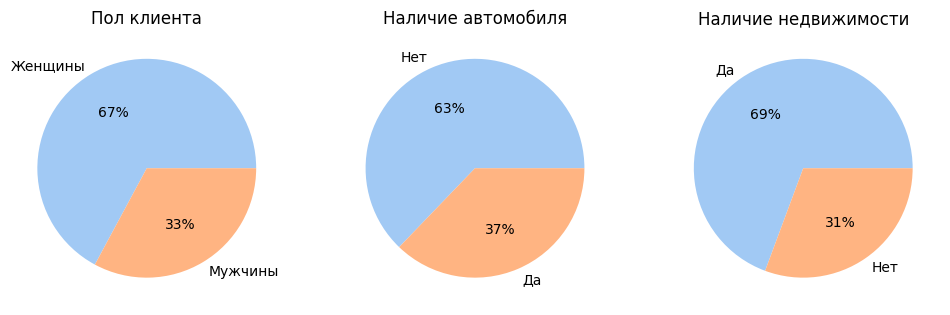

In [893]:
colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))

ax[0].pie(gender_val, labels=['Женщины', 'Мужчины'], colors = colors, autopct='%.0f%%')
ax[1].pie(own_car_val, labels=['Нет', 'Да'], colors = colors, autopct='%.0f%%')
ax[2].pie(own_realty_val, labels=['Да', 'Нет'], colors = colors, autopct='%.0f%%')

ax[0].set_title('Пол клиента')
ax[1].set_title('Наличие автомобиля')
ax[2].set_title('Наличие недвижимости')

plt.show()

Больше половины клиентов — женщины, не имеют автомобиля, но при этом имеют недвижимость.

In [894]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Изучим аналогичным способом другие категориальные (но уже небинарные) признаки с помощью линейных диаграмм

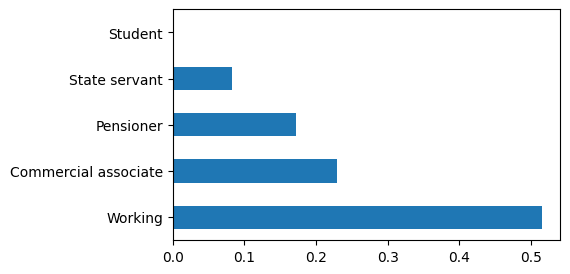

In [895]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = app_data['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

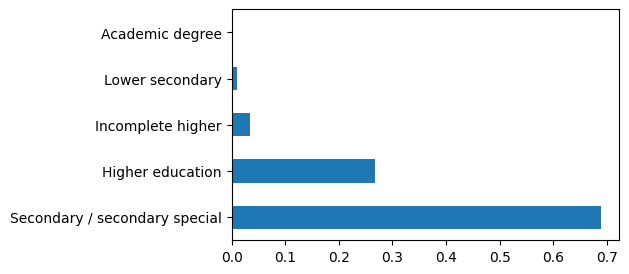

In [896]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

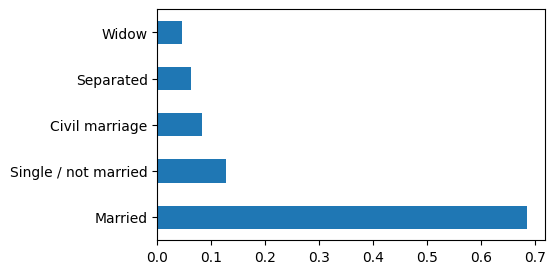

In [897]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

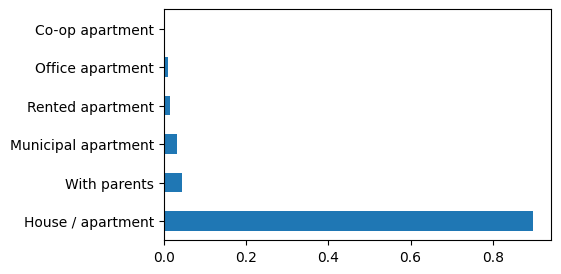

In [898]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = app_data['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

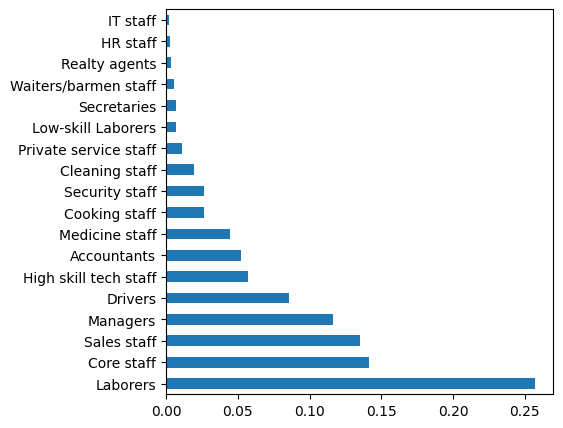

In [899]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = app_data['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

По изученным только что признакам делаем вывод, что типичный клиент — работающий человек со средним/средним специальным образованием, находящийся в браке и имеющий дом/квартиру в собственности. Наиболее распространенные типы занятости — рабочий, персонал (основной и торговый), а также менеджер и водитель.

Посмотрим, как уровень образования влияет на доход клиентов:

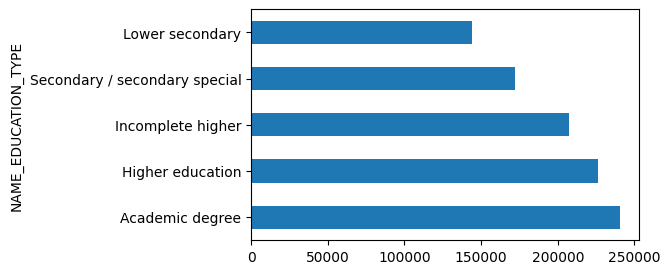

In [900]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = app_data.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

In [901]:
import math
print("Средний доход клиентов:", math.ceil(app_data.AMT_INCOME_TOTAL.mean()))
print("Медианный доход клиентов:", math.ceil(app_data.AMT_INCOME_TOTAL.median()))

Средний доход клиентов: 187525
Медианный доход клиентов: 160781


Получили ожидаемые данные — чем выше уровень образования, тем выше средний доход. Получили также средний и медианный доход по всем клиентам (вне зависимости от каких-либо категорий) — 187525 и 160781 соответственно.

### Обработка пропусков в данных

In [902]:
app_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [903]:
credit_data.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [904]:
app_data['OCCUPATION_TYPE'].isnull().sum()/len(app_data['OCCUPATION_TYPE'])

0.30601039317580153

Видим, что в столбце OCCUPATION_TYPE около 30% пропущенных значений — заменим пропуски на значение 'Unemployed' (безработный)

In [905]:
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].apply(lambda x : 'Unemployed' if pd.isnull(x) else x)
app_data['OCCUPATION_TYPE'].value_counts()

Unemployed               134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

### Подготовка данных к обучению модели

#### Преобразования таблицы credit_record

In [906]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Приведём данные в столбце MONTHS_BALANCE к более читабельному виду

In [907]:
credit_data['MONTHS_BALANCE'] = credit_data['MONTHS_BALANCE'].apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_data.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'}, inplace=True)
cardholder_tenure.head()

,CUST_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


Объединяем application_records и credit_record, чтобы получить количество месяцев, в течение которых у клиента была карта

In [908]:
cust_data = pd.merge(app_data, cardholder_tenure, on = 'ID', how = 'inner')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unemployed,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unemployed,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [909]:
cust_data.shape

(36457, 19)

Приведём категориальные признаки в таблице credit_record к численным

In [910]:
credit_data['STATUS'][credit_data["STATUS"] == 'C'] = -1
credit_data['STATUS'][credit_data["STATUS"] == 'X'] = -1
credit_data['STATUS'] = credit_data.STATUS.apply(lambda x : int(x))
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


В таблие credit_record нас интересуют записи по клиентам с максимальным показателем STATUS (что показывает его актуальный статус наличия задолженностей). Вполним сортировку и удалим дубликаты в таблице, получив интересующие нас записи

In [911]:
credit_data.sort_values(by = 'STATUS', ascending = False, inplace = True)
credit_data.drop_duplicates(subset = ['ID'], inplace = True)
credit_data.shape

(45985, 3)

Предполагая, что человек считается неплательщиком по отношению к банку, если его платеж задерживается более чем на 60 дней. Таким образом, все клиенты, имеющие STATUS >= 2, будут рассматриваться как неплательщики или плохие клиенты

In [912]:
credit_data['target'] = credit_data['STATUS'].apply(lambda x: 0 if x>=2 else 1)
credit_data.drop(['STATUS', 'MONTHS_BALANCE'], axis=1, inplace=True)
credit_data.head()

,ID,target
372050,5042064,0
307952,5029028,0
723708,5097065,0
942335,5135344,0
832456,5117313,0


In [913]:
credit_data['target'].value_counts()

1    45318
0      667
Name: target, dtype: int64

#### Формирование итоговой таблицы, по которой будем обучать модель

Присоединим преобразованную только что таблицу credit_record к созданной выше таблице cust_data

In [914]:
cust_data = pd.merge(cust_data, credit_data, on='ID', how='inner')
cust_data.shape

(36457, 20)

In [915]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unemployed,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unemployed,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


В таблице остались лишние дубликаты — строки, в которых отличаются ID, но все остальные значения совпадают. Удалим их

In [916]:
cust_data.drop_duplicates(subset=cust_data.columns.to_list()[1:], inplace=True)
cust_data.shape

(32177, 20)

In [917]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   32177 non-null  int64  
 1   CODE_GENDER          32177 non-null  object 
 2   FLAG_OWN_CAR         32177 non-null  object 
 3   FLAG_OWN_REALTY      32177 non-null  object 
 4   CNT_CHILDREN         32177 non-null  int64  
 5   AMT_INCOME_TOTAL     32177 non-null  float64
 6   NAME_INCOME_TYPE     32177 non-null  object 
 7   NAME_EDUCATION_TYPE  32177 non-null  object 
 8   NAME_FAMILY_STATUS   32177 non-null  object 
 9   NAME_HOUSING_TYPE    32177 non-null  object 
 10  DAYS_BIRTH           32177 non-null  int64  
 11  DAYS_EMPLOYED        32177 non-null  int64  
 12  FLAG_MOBIL           32177 non-null  int64  
 13  FLAG_WORK_PHONE      32177 non-null  int64  
 14  FLAG_PHONE           32177 non-null  int64  
 15  FLAG_EMAIL           32177 non-null 

Построим тепловую карту для визуализации связи между сферой занятости и семейным положением в наших данных

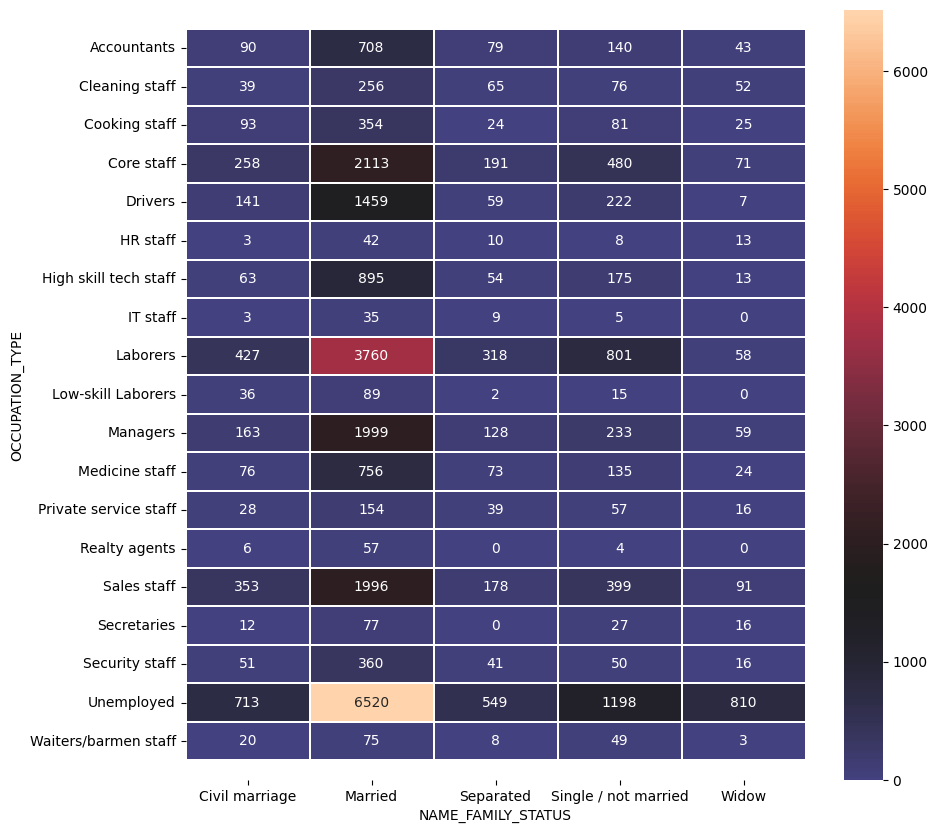

In [918]:
pvt_tbl = pd.pivot_table(data=cust_data, index=['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'],
                         values='target', aggfunc=sum, fill_value=0)
plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Связь между жизненным статусом и типом жилья

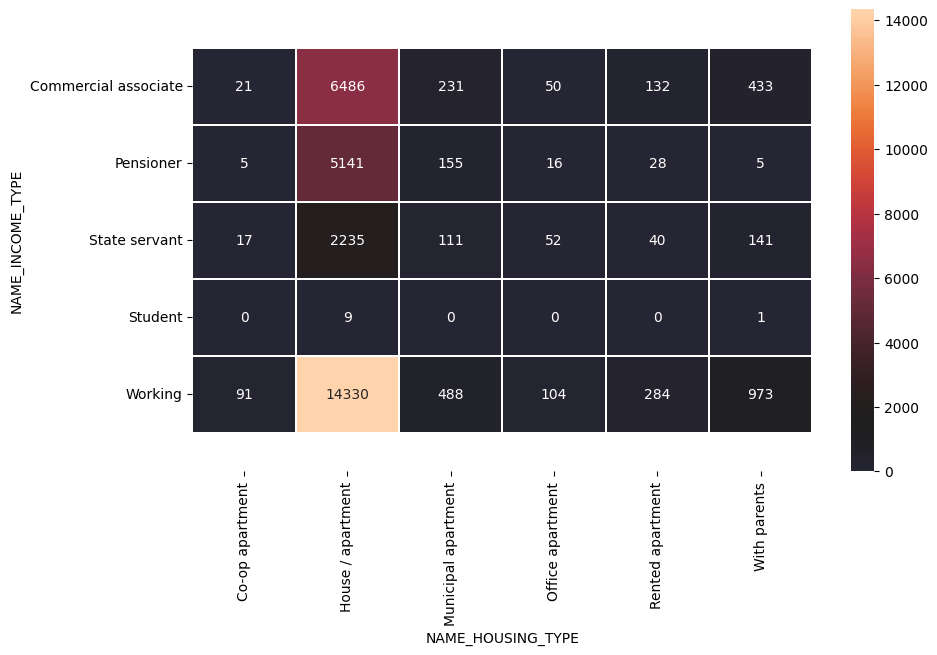

In [919]:
pvt_tbl = pd.pivot_table(data = cust_data, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,6])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Отметим, что столбцы с информацией о наличии контактов клиента (FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE и FLAG_EMAIL) ничего не говорят о его состоятельности, поэтому стоит удалить их из таблицы

In [920]:
cust_data.drop(['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unemployed,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unemployed,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,26,1


Также заметим, что признак с количеством членов семьи (CNT_FAM_MEMBERS) должен иметь тип int, а не float — преобразуем его:

In [921]:
cust_data['CNT_FAM_MEMBERS'] = cust_data['CNT_FAM_MEMBERS'].astype('int')
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 36456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   32177 non-null  int64  
 1   CODE_GENDER          32177 non-null  object 
 2   FLAG_OWN_CAR         32177 non-null  object 
 3   FLAG_OWN_REALTY      32177 non-null  object 
 4   CNT_CHILDREN         32177 non-null  int64  
 5   AMT_INCOME_TOTAL     32177 non-null  float64
 6   NAME_INCOME_TYPE     32177 non-null  object 
 7   NAME_EDUCATION_TYPE  32177 non-null  object 
 8   NAME_FAMILY_STATUS   32177 non-null  object 
 9   NAME_HOUSING_TYPE    32177 non-null  object 
 10  DAYS_BIRTH           32177 non-null  int64  
 11  DAYS_EMPLOYED        32177 non-null  int64  
 12  OCCUPATION_TYPE      32177 non-null  object 
 13  CNT_FAM_MEMBERS      32177 non-null  int64  
 14  CUST_FOR_MONTHS      32177 non-null  int64  
 15  target               32177 non-null 

Преобразуем бинарные признаки в численные (мужской пол – 1, женский пол — 0, да — 1, нет — 0)

In [922]:
cust_data['CODE_GENDER'] = cust_data['CODE_GENDER'].apply(lambda x: 1 if x == 'M' else 0)
cust_data['FLAG_OWN_CAR'] = cust_data['FLAG_OWN_CAR'].apply(lambda x: 0 if x == 'N' else 1)
cust_data['FLAG_OWN_REALTY'] = cust_data['FLAG_OWN_REALTY'].apply(lambda x: 0 if x == 'N' else 1)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unemployed,2,15,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unemployed,2,14,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,29,1
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,4,1
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,26,1


Преобразуем столбцы DAYS_BIRTH и DAYS_EMPLOYED в интуитивный для нас вид

In [923]:
cust_data[cust_data['DAYS_EMPLOYED'] > 0]['NAME_INCOME_TYPE'].unique()

array(['Pensioner'], dtype=object)

Таким образом мы убедились, что все положительные значения в столбце DAYS_EMPLOYED соответствуют пенсионерам, то есть не являются ошибками в данных. Теперь преобразуем отрицательные значения в столбцах DAYS_BIRTH и DAYS_EMPLOYED в положительные

In [924]:
def convert_to_positive(df, column):
    df[column] = df[column].apply(lambda x: x*-1)
    return df

continuous_variables = ['DAYS_BIRTH', 'DAYS_EMPLOYED']
for c in continuous_variables:
    cust_data = convert_to_positive(cust_data, c)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,Unemployed,2,15,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,Unemployed,2,14,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,Security staff,2,29,1
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,Sales staff,1,4,1
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,Sales staff,1,26,1


Преобразуем дни в каждом из двух столбцов в года

In [925]:
cust_data['AGE'] = round(cust_data['DAYS_BIRTH']/365, 1)
cust_data['YEARS_EMPLOYED'] = round(cust_data['DAYS_EMPLOYED']/365, 1)
cust_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,15,1,32.9,12.4
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,14,1,32.9,12.4
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,29,1,58.8,3.1
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,4,1,52.4,8.4
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,26,1,52.4,8.4


Вспомним про специфику пенсионеров — для них значения YEARS_EMPLOYED сейчас не положительные, а отрицательные (в силу того, что ранее мы меняли знаки, умножая на -1). Для них примем значение YEARS_EMPLOYED равным -1

In [926]:
cust_data['YEARS_EMPLOYED'] = cust_data['YEARS_EMPLOYED'].apply(lambda x: -1 if x<0 else x)

#### Биннинг данных для "непрерывных" переменных для дальнейшего построения модели

In [927]:
cust_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED
count,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,5.078181e+06,0.330733,0.378842,0.671194,0.431395,1.858457e+05,2.199521,26.070268,0.981415,43.771327,5.836038
std,4.181678e+04,0.470484,0.485106,0.469787,0.745757,1.007217e+05,0.914533,16.465296,0.135055,11.545846,6.650972
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,1.000000,0.000000,0.000000,20.500000,-1.000000
25%,5.041913e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,2.000000,12.000000,1.000000,34.100000,1.100000
50%,5.074710e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,2.000000,24.000000,1.000000,42.600000,4.200000
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,39.000000,1.000000,53.300000,8.600000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,20.000000,60.000000,1.000000,68.900000,43.000000


Биннинг столбца 'CNT_CHILDREN'

Поскольку все бины должны содержать по крайней мере 5% от общего числа наблюдений, поэтому разделяем 'CNT_CHILDREN' на [0,1,1+] бины

In [928]:
cust_data['cnt_child_category'] = cust_data['CNT_CHILDREN'].apply(lambda x : '1+' if x>= 2 else str(x))

Биннинг столбца 'AMT_INCOME_TOTAL'

In [929]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
cust_data['income_bin'] = pd.cut(cust_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED,cnt_child_category,income_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,15,1,32.9,12.4,0,1600000
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,14,1,32.9,12.4,0,1600000
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,29,1,58.8,3.1,0,150000
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,4,1,52.4,8.4,0,300000
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,26,1,52.4,8.4,0,300000


In [930]:
cust_data['income_bin'].value_counts()

150000     9059
200000     6832
250000     6019
100000     3113
300000     2407
1600000    2028
70000      1411
350000     1308
Name: income_bin, dtype: int64

Биннинг столбца 'CNT_FAM_MEMBERS'

In [931]:
cust_data['CNT_FAM_MEMBERS'].value_counts()

2     17166
1      6168
3      5665
4      2748
5       357
6        50
7        17
15        3
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [932]:
cust_data['cnt_family_bin'] = cust_data['CNT_FAM_MEMBERS'].apply(lambda x : '3+' if x>=4 else str(x))

Биннинг столбца 'CUST_FOR_MONTHS'

In [933]:
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']
cust_data['months_bin'] = pd.cut(cust_data['CUST_FOR_MONTHS'], bins=bins, labels=labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,15,1,32.9,12.4,0,1600000,2,1.5
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,14,1,32.9,12.4,0,1600000,2,1.5
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,29,1,58.8,3.1,0,150000,2,2.5
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,4,1,52.4,8.4,0,300000,1,0.5
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,26,1,52.4,8.4,0,300000,1,2.5


In [934]:
cust_data.months_bin.value_counts()

1      4279
0.5    4200
1.5    4096
2      3639
2.5    3453
3.5    3079
3      3049
4      2433
4.5    2214
5      1735
Name: months_bin, dtype: int64

Биннинг столбца 'YEARS_EMPLOYED'

In [935]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired', '5', '10', '15', '20', '20+']
cust_data['emp_years_bin'] = pd.cut(cust_data['YEARS_EMPLOYED'], bins=bins, labels=labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,15,1,32.9,12.4,0,1600000,2,1.5,15
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,14,1,32.9,12.4,0,1600000,2,1.5,15
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,29,1,58.8,3.1,0,150000,2,2.5,5
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,4,1,52.4,8.4,0,300000,1,0.5,10
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,26,1,52.4,8.4,0,300000,1,2.5,10


In [936]:
cust_data.emp_years_bin.value_counts()

5          12701
10          7852
retired     5461
15          3211
20+         1516
20          1436
Name: emp_years_bin, dtype: int64

Биннинг столбца 'AGE'

In [937]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27', '30', '35', '40', '45', '50', '55', '62', '70']
cust_data['age_bin'] = pd.cut(cust_data['AGE'], bins=bins, labels=labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,32.9,12.4,0,1600000,2,1.5,15,35
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,1,32.9,12.4,0,1600000,2,1.5,15,35
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,1,58.8,3.1,0,150000,2,2.5,5,62
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,1,52.4,8.4,0,300000,1,0.5,10,55
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,1,52.4,8.4,0,300000,1,2.5,10,55


In [938]:
cust_data.age_bin.value_counts()

40    4711
62    4612
35    4469
45    4448
50    3706
55    3594
30    2798
70    2195
27    1644
Name: age_bin, dtype: int64

#### Прогноз надежности клиента с помощью машинного обучения

#### Логистическая регрессия

Создадим фиктивные переменные для тенировки модели

In [939]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,32.9,12.4,0,1600000,2,1.5,15,35
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,1,32.9,12.4,0,1600000,2,1.5,15,35
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,1,58.8,3.1,0,150000,2,2.5,5,62
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,1,52.4,8.4,0,300000,1,0.5,10,55
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,1,52.4,8.4,0,300000,1,2.5,10,55


In [940]:
cust_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS', 'target', 'AGE', 'YEARS_EMPLOYED',
       'cnt_child_category', 'income_bin', 'cnt_family_bin', 'months_bin',
       'emp_years_bin', 'age_bin'],
      dtype='object')

In [941]:
cust_data_train = cust_data[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                             'cnt_child_category', 'income_bin', 'cnt_family_bin', 'months_bin', 'emp_years_bin', 'age_bin', 'target']]
cust_data_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin,target
0,1,1,1,Working,Higher education,Civil marriage,Rented apartment,Unemployed,0,1600000,2,1.5,15,35,1
1,1,1,1,Working,Higher education,Civil marriage,Rented apartment,Unemployed,0,1600000,2,1.5,15,35,1
2,1,1,1,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,150000,2,2.5,5,62,1
3,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,300000,1,0.5,10,55,1
4,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,300000,1,2.5,10,55,1


In [942]:
def creatingDummyVariables(df, columns) :
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    df1 = pd.concat([df, dummy1], axis=1)
    df1.drop(columns, axis = 1, inplace = True)
    return df1

In [943]:
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                           'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'cnt_child_category', 'income_bin', 'cnt_family_bin', 'months_bin', 'emp_years_bin', 'age_bin'])

In [944]:
cust_data_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,target,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,emp_years_bin_20,emp_years_bin_20+,age_bin_30,age_bin_35,age_bin_40,age_bin_45,age_bin_50,age_bin_55,age_bin_62,age_bin_70
0,1,1,1,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Построение модели логистической регрессии

In [945]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [946]:
X = cust_data_train.drop(['target'], axis=1)
y = cust_data_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [947]:
y_train.value_counts()

1    22107
0      416
Name: target, dtype: int64

Видим сильный дисбаланс в данных — восполним его с помощью библиотеки imblearn. Затроем только тренировочную выборку, чтобы обучить модель на наиболее сбалансированных данных, а тестовые данные оставим в прежнем виде:

In [948]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_balance, y_train_balance = oversample.fit_resample(X_train, y_train)

In [949]:
y_train_balance.value_counts()

1    22107
0    22107
Name: target, dtype: int64

In [950]:
logreg = LogisticRegression()

logreg.fit(X_train_balance, y_train_balance)
train_sc = logreg.score(X_train_balance, y_train_balance)
print('Logistic Regression train score:', train_sc)

test_sc = logreg.score(X_test, y_test)
print('Logistic Regression test score:', test_sc)

Logistic Regression train score: 0.9200027140724657
Logistic Regression test score: 0.90863890615289


In [951]:
y_test.value_counts()

1    9472
0     182
Name: target, dtype: int64

In [952]:
from sklearn.metrics import accuracy_score

y_predict = logreg.predict(X_test)
print('Показатель точности предсказаний модели логистической регрессии: {:.5}'.format(accuracy_score(y_test, y_predict)))

Показатель точности предсказаний модели логистической регрессии: 0.90864


In [953]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_predict)

array([[   5,  177],
       [ 705, 8767]])

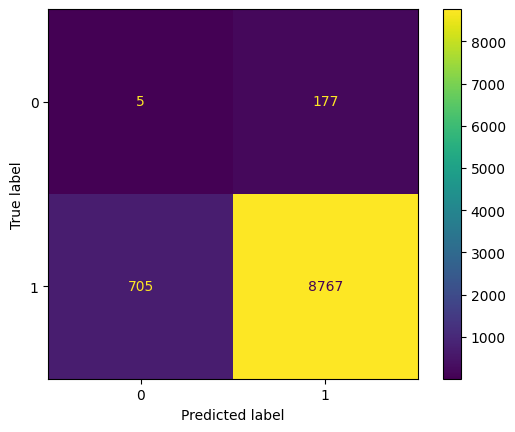

In [954]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

In [854]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.02      0.06      0.03       188
           1       0.98      0.93      0.95      9466

    accuracy                           0.91      9654
   macro avg       0.50      0.49      0.49      9654
weighted avg       0.96      0.91      0.93      9654



Делаем промежуточный вывод — наша модель хорошо предсказывает благонадежность клиентов (98% от всех предсказаний было сделано верно), однако точность предсказания неблагонадёжных крайне низкая — всего 2%. Далее построим другие модели и сравним их результаты.

#### Деревья решений

In [955]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [956]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUST_FOR_MONTHS,target,AGE,YEARS_EMPLOYED,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,32.9,12.4,0,1600000,2,1.5,15,35
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,1,32.9,12.4,0,1600000,2,1.5,15,35
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,1,58.8,3.1,0,150000,2,2.5,5,62
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,1,52.4,8.4,0,300000,1,0.5,10,55
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,1,52.4,8.4,0,300000,1,2.5,10,55


Сформируем новую таблицу для обучения модели — без бинов, более подходящую для модели деревьев решений

In [957]:
cust_data_train = cust_data[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                             'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS', 'YEARS_EMPLOYED', 'AGE', 'target']]

In [958]:
cust_data_train.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,YEARS_EMPLOYED,AGE,target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,15,12.4,32.9,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Unemployed,2,14,12.4,32.9,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,29,3.1,58.8,1
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,4,8.4,52.4,1
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,26,8.4,52.4,1


In [959]:
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                           'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [960]:
X = cust_data_train.drop('target', 1)
y = cust_data_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [961]:
y_train.value_counts()

1    22110
0      413
Name: target, dtype: int64

In [962]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_balance, y_train_balance = oversample.fit_resample(X_train, y_train)

In [963]:
y_train_balance.value_counts()

1    22110
0    22110
Name: target, dtype: int64

In [964]:
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train_balance, y_train_balance)
y_preds = dt_basic.predict(X_test)
accuracy_value = accuracy_score(y_test, y_preds)
accuracy_value

0.9613631655272425

In [965]:
confusion_matrix(y_test, y_preds)

array([[  44,  141],
       [ 232, 9237]])

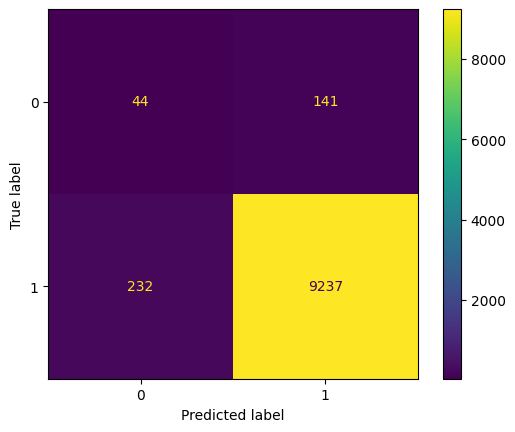

In [966]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_basic.classes_)
disp.plot()
plt.show()

In [967]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.16      0.24      0.19       185
           1       0.98      0.98      0.98      9469

    accuracy                           0.96      9654
   macro avg       0.57      0.61      0.59      9654
weighted avg       0.97      0.96      0.97      9654



Вывод: модель деревьев решений со стандартными параметрами показывает себя лучше, чем логистическая регрессия — в этот раз показатель точности предсказаний плохих клиентов составил 16% (при том что ранее он составлял 2%). Показатель точности предсказаний хороших клиентов не изменился и составил 98%. 

Подберём гиперпараметры для нашего дерева

In [968]:
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 210, 50),
    'min_samples_split': range(50, 210, 50),
    'criterion': ['gini','entropy'] 
}
n_folds = 5

In [969]:
dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs=-1, return_train_score=True)

In [970]:
grid.fit(X_train_balance, y_train_balance)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 210, 50),
                         'min_samples_split': range(50, 210, 50)},
             return_train_score=True)

In [971]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [972]:
grid.best_score_

0.9109452736318409

In [973]:
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=100)

In [974]:
best_grid.fit(X_train_balance, y_train_balance)
y_predict = best_grid.predict(X_test)
print('Показатель точности предсказаний модели: {:.5}'.format(accuracy_score(y_test, y_predict)))

Показатель точности предсказаний модели: 0.89776


In [975]:
confusion_matrix(y_test, y_predict)

array([[  49,  136],
       [ 851, 8618]])

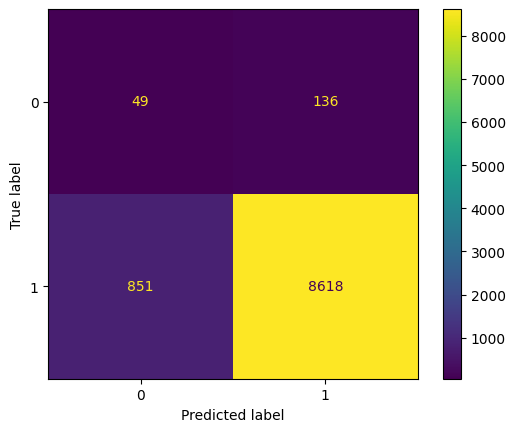

In [976]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_grid.classes_)
disp.plot()
plt.show()

In [977]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.05      0.26      0.09       185
           1       0.98      0.91      0.95      9469

    accuracy                           0.90      9654
   macro avg       0.52      0.59      0.52      9654
weighted avg       0.97      0.90      0.93      9654



Подобранные нами параметры не превосходят по показателям стандартные. Лучшей моделью пока остаётся модель деревьев решений со стандартными параметрами.

#### Случайный лес

In [978]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
oversample = SMOTE()
X_train_balance, y_train_balance = oversample.fit_resample(X_train, y_train)

In [979]:
model = RandomForestClassifier()
model.fit(X_train_balance, y_train_balance)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
confusion_matrix(y_test, y_predict)

Accuracy Score is 0.97452


array([[  27,  179],
       [  67, 9381]])

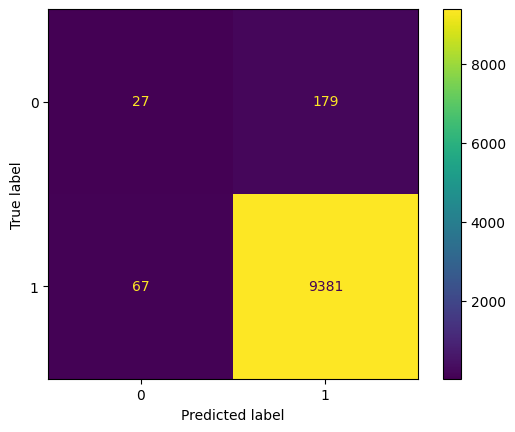

In [980]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [981]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.29      0.13      0.18       206
           1       0.98      0.99      0.99      9448

    accuracy                           0.97      9654
   macro avg       0.63      0.56      0.58      9654
weighted avg       0.97      0.97      0.97      9654



Видим, что модель случайного леса со стандартными параметрами показывает наивысшую точность среди всех предыдущих — 29% точность предсказания плохих клиентов и 98% точность предсказания хороших клиентов.

Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc_final = RandomForestClassifier() 

n_estimators = [100, 300, 500, 700]
max_features = ['sqrt']
max_depth = [2, 3, 7, 11, 15]
min_samples_split = [2, 3, 4, 22, 23, 24]
min_samples_leaf = [2, 3, 4, 5, 6, 7]
bootstrap = [False]

param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rfc_final, param_grid, cv=3, verbose=1, n_jobs=-1)
gs.fit(X_train_balance, y_train_balance)
gs.best_params_

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [982]:
rfc_3 = RandomForestClassifier(bootstrap=False, max_depth=15, max_features='sqrt', min_samples_leaf=2,
                               min_samples_split=2, n_estimators=100)
rfc_3.fit(X_train_balance, y_train_balance)
y_pred_gs = rfc_3.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_gs)))
confusion_matrix(y_test, y_pred_gs)

Accuracy Score is 0.96116


array([[  34,  172],
       [ 203, 9245]])

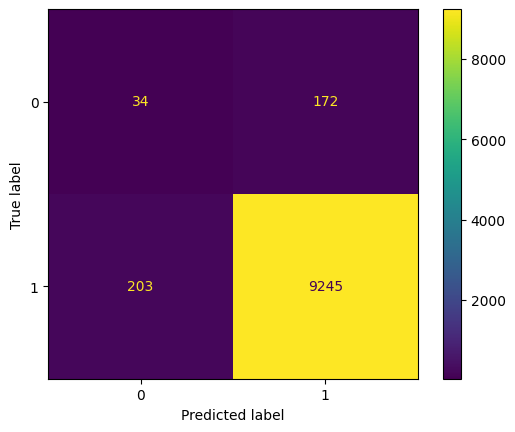

In [983]:
cm = confusion_matrix(y_test, y_pred_gs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_3.classes_)
disp.plot()
plt.show()

In [984]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.14      0.17      0.15       206
           1       0.98      0.98      0.98      9448

    accuracy                           0.96      9654
   macro avg       0.56      0.57      0.57      9654
weighted avg       0.96      0.96      0.96      9654



Показатели для подобранных нами гиперпараметров не улучшились в сравнении со стандартными — лучшей моделью остается случайный лес со стандартными параметрами.

#### Градиентный бустинг

In [985]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
oversample = SMOTE()
X_train_balance, y_train_balance = oversample.fit_resample(X_train, y_train)

xgb = XGBClassifier()
model = xgb.fit(X_train_balance, y_train_balance)
prediction = xgb.predict(X_test)

print('Показатель точности предсказаний модели: {:.5}'.format(accuracy_score(y_test, y_predict)))

Показатель точности предсказаний модели: 0.97483


In [777]:
confusion_matrix(y_test, prediction)

array([[  43,  140],
       [ 113, 9358]])

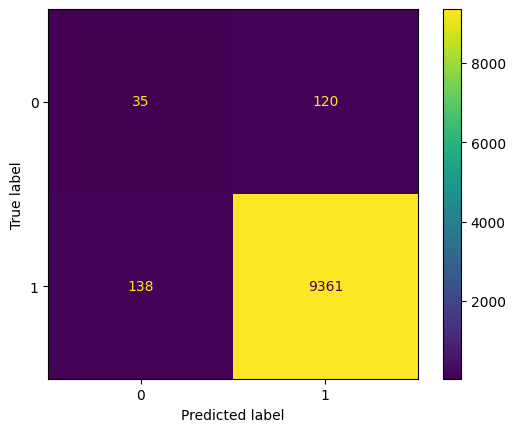

In [986]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

In [987]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.20      0.23      0.21       155
           1       0.99      0.99      0.99      9499

    accuracy                           0.97      9654
   macro avg       0.59      0.61      0.60      9654
weighted avg       0.97      0.97      0.97      9654



**Вывод: лучше всего с предсказанием благонадёжности клиента справляется модель случайного леса со стандартными параметрами (29% точность предсказания плохих клиентов и 98% точность предсказания хороших клиентов) — оставим её в качестве итоговой модели в рамках нашего исследования.**